In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/adsm1rnov/GP-2/refs/heads/develop/hotellook.csv')
df.head(3)

<ipython-input-107-030b74d4f482>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/adsm1rnov/GP-2/refs/heads/develop/hotellook.csv')


,id,name,address,location_id,latitude,longitude,stars,rating,reviews_count,min_price,...,popularity,popularity2,trending_speed,photos_ids,pois_distances,nearest_poi_by_category,districts_ids,weights,scoring,debug_info
0,1250022545,Мини-Отель Мопс на Рубинштейна,"улица Рубинштейна, д.12, Санкт-Петербург",12196,59.931152,30.345670,3,9.2,498,19,...,69104,291,1.6,"['7515131692', '8286984314', '7515134055', '75...","{'71006': 14062, '71781': 732, '71817': 433, '...","{'airport': 71006, 'beach': 346587, 'metro_sta...",[1664298],{'default': 2.2985132},{},NaN
1,964250854,Мини Отель Mushroom,"Набережная Канала Грибоедова,42",12196,59.930200,30.319010,3,9.3,0,17,...,69103,232,0.0,"['7510410856', '9611111725', '9400656506', '94...","{'71006': 13814, '71842': 422, '71862': 405, '...","{'airport': 71006, 'beach': 346587, 'metro_sta...",[1416598],{'default': 2.0068567},{},NaN
2,333570,Отель Вега Измайлово,Измайловское шоссе 71 строение 3В,12153,55.790752,37.747135,4,9.0,15712,46,...,69102,2268,0.0,"['7489913361', '8352837505', '8352837517', '74...","{'69873': 35331, '69874': 42911, '69885': 2839...","{'airport': 69885, 'metro_station': 72010, 'tr...",[1416636],{'default': 2.2766292},{},NaN


In [44]:
df.isnull().sum()

,0
id,0
name,4001
address,94
location_id,0
latitude,0
longitude,0
stars,0
rating,0
reviews_count,0
min_price,0


In [42]:
df.duplicated().sum()

0

In [30]:
print(df['check_in'].unique()) 
print(df['check_out'].unique()) 
print(df['year_opened'].unique()) 
print(df['year_renovated'].unique()) 
print(df['debug_info'].unique()) 

[nan]
[nan]
[0]
[0]
[nan]


Поскольку в стоблцах check_in, check_out, year_opened, year_renovated и debug_info указаны нули и nan, мы смело можем их удалить

In [108]:
df.drop(columns=['year_opened','year_renovated','photos_ids','chain', 'scoring', 'median_min_price', 'debug_info'],inplace=True)
df.columns

Index(['id', 'name', 'address', 'location_id', 'latitude', 'longitude',
       'stars', 'rating', 'reviews_count', 'min_price', 'distance_to_center',
       'property_type', 'photos_count', 'amenities', 'badges', 'check_in',
       'check_out', 'popularity', 'popularity2', 'trending_speed',
       'pois_distances', 'nearest_poi_by_category', 'districts_ids',
       'weights'],
      dtype='object')

In [70]:
df.isnull().sum()

,0
id,0
name,4001
address,94
location_id,0
latitude,0
longitude,0
stars,0
rating,0
reviews_count,0
min_price,0


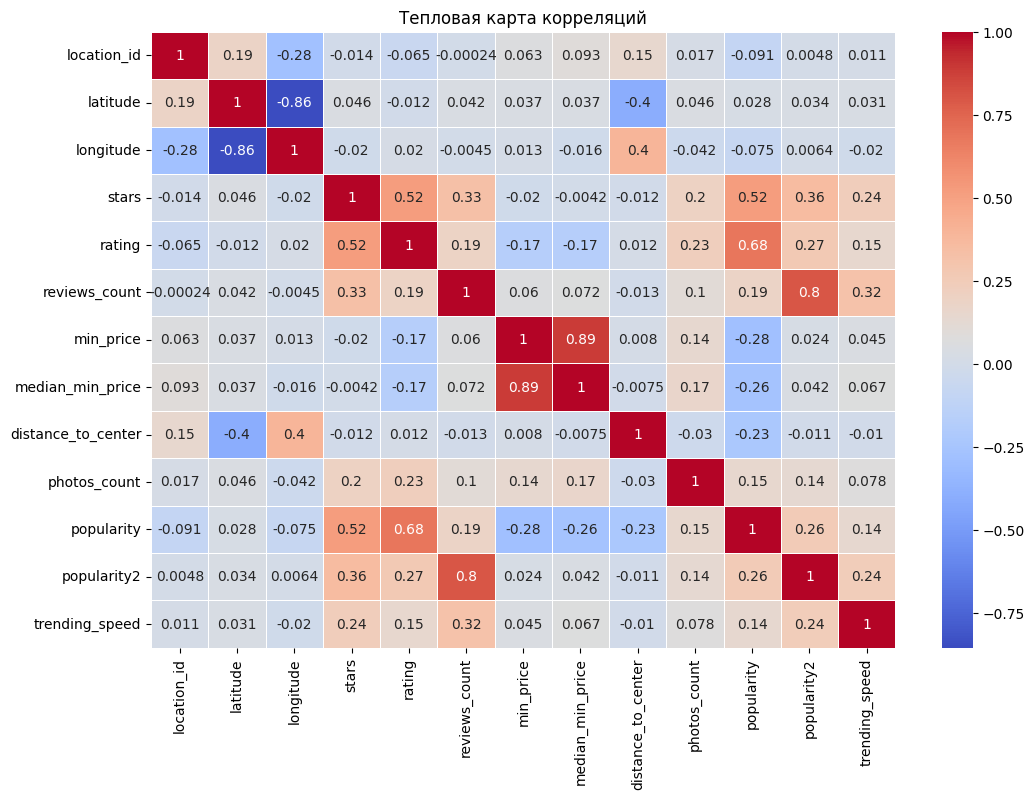

In [47]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

In [109]:
# 12153 - Москва
# 12196 - Санкт-Петербург
# 12193 - Сочи
# 12099 - Анапа

location_mapping = {
    12099: "Анапа",
    12153: "Москва",
    12193: "Сочи",
    12196: "Санкт-Петербург"
    }

df["location_id"] = df["location_id"].map(location_mapping)

Столбец amenities - услуги отеля и его удобства

In [110]:
def extract_sorted_numbers(value):
    try:
        data = ast.literal_eval(value)
        if isinstance(data, dict):
            numbers = [int(k) for k in data.keys() if k.isdigit()]
        elif isinstance(data, list):
            numbers = [int(item) for item in data if isinstance(item, (int, str)) and str(item).isdigit()]
        else:
            return ""
        return ", ".join(map(str, sorted(numbers)))
    except (ValueError, SyntaxError):
        return ""

if "amenities" in df.columns:
    df["amenities"] = df["amenities"].astype(str).apply(extract_sorted_numbers)

Столбец badges - особенности отеля, "тэги". Преобразуем список в строку

In [111]:
def extract_words(value):
    try:
        data = ast.literal_eval(value)
        if isinstance(data, dict):
            words = [str(v) for v in data.values() if isinstance(v, str)]
        elif isinstance(data, list):
            words = [str(item) for item in data if isinstance(item, str)]
        else:
            return ""
        return ", ".join(words)
    except (ValueError, SyntaxError):
        return ""

if "badges" in df.columns:
    df["badges"] = df["badges"].astype(str).apply(extract_words)

nearest_poi_by_category и pois_distances указывают расстояние до ближайших мест (аэропорт, пляж, метро)

In [112]:
def extract_poi_mapping(value):
    try:
        data = ast.literal_eval(value)
        if isinstance(data, dict):
            return {str(v): k for k, v in data.items() if isinstance(v, (int, str))}
        return {}
    except (ValueError, SyntaxError):
        return {}

def format_pois_distances(value, poi_mapping):
    try:
        data = ast.literal_eval(value)
        if isinstance(data, dict):
            formatted_items = []
            for key, distance in data.items():
                place_name = poi_mapping.get(str(key), key)  # Заменяем цифры на слова, если есть в mapping
                formatted_items.append(f"{place_name}: {distance}")
            return ", ".join(formatted_items)
        else:
            return ""
    except (ValueError, SyntaxError):
        return ""

poi_mapping = {}
df["nearest_poi_by_category"].dropna().apply(lambda x: poi_mapping.update(extract_poi_mapping(x)))
df["pois_distances"] = df["pois_distances"].astype(str).apply(lambda x: format_pois_distances(x, poi_mapping))

In [113]:
df.drop(columns='nearest_poi_by_category', inplace=True)

In [114]:
expanded_district_boundaries_v2 = {
    "Москва - Центральный округ": {"lat_min": 55.70, "lat_max": 55.80, "lon_min": 37.50, "lon_max": 37.80},
    "Москва - Северный округ": {"lat_min": 55.80, "lat_max": 56.00, "lon_min": 37.30, "lon_max": 37.70},
    "Москва - Южный округ": {"lat_min": 55.50, "lat_max": 55.70, "lon_min": 37.40, "lon_max": 37.80},
    "Санкт-Петербург - Центральный район": {"lat_min": 59.90, "lat_max": 60.00, "lon_min": 30.20, "lon_max": 30.45},
    "Санкт-Петербург - Василеостровский район": {"lat_min": 59.90, "lat_max": 60.00, "lon_min": 30.15, "lon_max": 30.30},
    "Санкт-Петербург - Московский район": {"lat_min": 59.80, "lat_max": 59.90, "lon_min": 30.20, "lon_max": 30.45},
    "Сочи - Центральный район": {"lat_min": 43.50, "lat_max": 43.65, "lon_min": 39.60, "lon_max": 39.85},
    "Сочи - Адлерский район": {"lat_min": 43.35, "lat_max": 43.50, "lon_min": 39.80, "lon_max": 40.10},
    "Сочи - Лазаревский район": {"lat_min": 43.80, "lat_max": 44.20, "lon_min": 39.20, "lon_max": 39.80},
    "Геленджик - Центральный район": {"lat_min": 44.50, "lat_max": 44.70, "lon_min": 37.80, "lon_max": 38.50},
    "Краснодар - Центральный округ": {"lat_min": 44.95, "lat_max": 45.15, "lon_min": 38.85, "lon_max": 39.20},}

def find_expanded_district_v2(lat, lon):
    for district, bounds in expanded_district_boundaries_v2.items():
        if bounds["lat_min"] <= lat <= bounds["lat_max"] and bounds["lon_min"] <= lon <= bounds["lon_max"]:
            return district
    return "Неизвестный район"

df["district_name"] = df.apply(lambda row: find_expanded_district_v2(row["latitude"], row["longitude"]), axis=1)

In [118]:
df[df['district_name']=='Неизвестный район'].count()

,0
id,12136
name,10740
address,12124
location_id,12136
latitude,12136
longitude,12136
stars,12136
rating,12136
reviews_count,12136
min_price,12136


In [121]:
df.drop(columns='districts_ids', inplace=True)

In [123]:
df["weights"] = df["weights"].apply(lambda x: ast.literal_eval(x).get("default") if isinstance(x, str) and x.startswith("{") else x)

In [124]:
df

,id,name,address,location_id,latitude,longitude,stars,rating,reviews_count,min_price,...,amenities,badges,check_in,check_out,popularity,popularity2,trending_speed,pois_distances,weights,district_name
0,1250022545,Мини-Отель Мопс на Рубинштейна,"улица Рубинштейна, д.12, Санкт-Петербург","Санкт-Петербург, Россия",59.931152,30.345670,3,9.2,498,19,...,"1, 3, 4, 6, 10, 11, 12, 14, 18, 20",quiet,NaN,NaN,69104,291,1.6,"airport: 14062, metro_station: 732, metro_stat...",2.298513,Санкт-Петербург - Центральный район
1,964250854,Мини Отель Mushroom,"Набережная Канала Грибоедова,42","Санкт-Петербург, Россия",59.930200,30.319010,3,9.3,0,17,...,"1, 3, 4, 5, 6, 10, 12, 14",,NaN,NaN,69103,232,0.0,"airport: 13814, metro_station: 422, metro_stat...",2.006857,Санкт-Петербург - Центральный район
2,333570,Отель Вега Измайлово,Измайловское шоссе 71 строение 3В,"Москва, Россия",55.790752,37.747135,4,9.0,15712,46,...,"0, 1, 3, 4, 5, 6, 9, 10, 11, 12, 14, 17, 18","popular, comfort, business, metro, transport, ...",NaN,NaN,69102,2268,0.0,"airport: 35331, airport: 42911, airport: 28394...",2.276629,Москва - Центральный округ
3,21120269,Версаль Отель,ул.Восстания д.12,"Санкт-Петербург, Россия",59.936010,30.360070,3,9.2,415,27,...,"1, 4, 5, 6, 10, 12, 14, 18",,NaN,NaN,69101,107,0.0,"airport: 14733, metro_station: 1158, metro_sta...",2.193986,Санкт-Петербург - Центральный район
4,1910372927,Отель Реноме,Гончарная улица 26,"Санкт-Петербург, Россия",59.928090,30.369590,4,9.1,0,23,...,"0, 1, 4, 5, 6, 10, 11, 12, 14, 18",,NaN,NaN,69099,566,0.0,"airport: 13991, metro_station: 1003, metro_sta...",2.173134,Санкт-Петербург - Центральный район
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42117,1915703569,"2-комн. квартира, 40 кв.м. на 4 человека","Воскресенская, 14/1","Сочи, Россия",43.402145,39.979725,0,0.0,0,193,...,,,NaN,NaN,121,0,0.0,"airport: 6056, beach: 974, beach: 1978, beach:...",0.171789,Сочи - Адлерский район
42118,1915947571,"1-комн. квартира, 25 кв.м. на 3 человека","Воскресенская улица, 14/1","Сочи, Россия",43.402195,39.979725,0,0.0,0,185,...,,,NaN,NaN,120,0,0.0,"airport: 6052, beach: 978, beach: 1983, beach:...",0.171789,Сочи - Адлерский район
42119,1915663041,"1-комн. квартира, 25 кв.м. на 3 человека","Воскресенская улица, 14","Сочи, Россия",43.398132,39.980553,0,0.0,0,173,...,,,NaN,NaN,118,0,0.0,"airport: 6475, beach: 681, beach: 1554, beach:...",0.171789,Сочи - Адлерский район
42120,1915723179,3-комнатная квартира,"Нижнеимеретинская улица, 137А","Сочи, Россия",43.397510,39.968616,0,0.0,0,109,...,,,NaN,NaN,113,0,0.0,"airport: 6124, beach: 59, beach: 2169, beach: ...",0.171789,Сочи - Адлерский район


In [127]:
df.to_csv("cleaned_hotellook.csv", index=False, encoding='utf-8')